In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"; # for GPU 1.

import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import  Pool
from functools import partial
import numpy as np
import pickle
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling1D

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
f=open('dataTrain_2.pk', 'rb')
train_data = pickle.load(f)
f.close()
f=open('dataValid_2.pk', 'rb')
valid_data = pickle.load(f)
f.close()

In [3]:
X_train= np.array([x for x in train_data['resizeDenoise'].values])
X_valid= np.array([x for x in valid_data['resizeDenoise'].values])

In [4]:
Y_train= np.array([y for y in train_data['classID'].values])
Y_valid= np.array([y for y in valid_data['classID'].values])

In [5]:
train_data = None
valid_data = None

In [6]:
numCols = X_train.shape[1]
print(numCols)

89009


In [7]:
X_train.shape

(6286, 89009)

In [8]:
def createModel():
    model = Sequential()
    model.add(Conv1D(32, 32, activation='relu', input_shape = (numCols,1)))
    model.add(MaxPooling1D(pool_size= 32))
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 32,activation='relu'))
    model.add(MaxPooling1D(pool_size=16))
    model.add(Dropout(0.2))

    model.add(Conv1D(256, 32,activation='relu'))
    model.add(MaxPooling1D(pool_size=8))
    model.add(Dropout(0.25))

    model.add(Conv1D(256, 12,activation='relu'))

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [9]:
model = createModel()
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Display model architecture summary 
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 88978, 32)         1056      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2780, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2780, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2749, 128)         131200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 171, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 171, 128)          0         
____

In [10]:
from tensorflow.keras.utils import to_categorical

X_train_r = X_train.reshape(X_train.shape[0], numCols, 1)
X_valid_r = X_valid.reshape(X_valid.shape[0], numCols, 1)
Y_train_r = to_categorical(Y_train)
Y_valid_r = to_categorical(Y_valid)

In [11]:
history = model.fit(X_train_r,
                      Y_train_r,
                      validation_data = (X_valid_r, 
                      Y_valid_r),
                      batch_size=12,
                      epochs=50)

Train on 6286 samples, validate on 1572 samples
Epoch 1/50
6286/6286 [==============================] - 24s 4ms/sample - loss: 2.2378 - acc: 0.1454 - val_loss: 2.1954 - val_acc: 0.1705
Epoch 2/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 2.1527 - acc: 0.1872 - val_loss: 2.1215 - val_acc: 0.1985
Epoch 3/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 2.0849 - acc: 0.2246 - val_loss: 2.0461 - val_acc: 0.2411
Epoch 4/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 1.9956 - acc: 0.2566 - val_loss: 1.8890 - val_acc: 0.2888
Epoch 5/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 1.8740 - acc: 0.3107 - val_loss: 1.8291 - val_acc: 0.3047
Epoch 6/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 1.7749 - acc: 0.3602 - val_loss: 1.7573 - val_acc: 0.3518
Epoch 7/50
6286/6286 [==============================] - 23s 4ms/sample - loss: 1.7029 - acc: 0.3820 - val_loss: 1.6808 - val_acc: 

In [12]:
f=open('dataTest_2.pk', 'rb')
test_data = pickle.load(f)
f.close()

In [13]:
X_test= np.array([x for x in test_data['resizeDenoise'].values])
Y_test= np.array([y for y in test_data['classID'].values])
X_test_r = X_test.reshape(X_test.shape[0], numCols, 1)

In [14]:
pred = model.predict(X_test_r)

In [15]:
label_names = ['air_conditioner','car_horn', 'children_playing', 'dog_bark', 
               'drilling', 'engine_idling', 'gun_shot', 'jackhammer','siren','street_music']

In [16]:
import sklearn.metrics as metrics
predout = np.argmax(pred, axis=1)
testout = Y_test
print("Test result: ")
print('Batch size is:', 12)

testScores = metrics.accuracy_score(testout, predout)
confusion = metrics.confusion_matrix(testout, predout)
print("Best accuracy (on test data set): %.2f%%" % (testScores * 100))
print(metrics.classification_report(testout, predout, labels=[0,1,2,3,4,5,6,7,8,9],target_names=label_names, digits=4))
print(confusion)

Test result: 
Batch size is: 12
Best accuracy (on test data set): 71.74%
                  precision    recall  f1-score   support

 air_conditioner     0.7549    0.7857    0.7700        98
        car_horn     0.4865    0.4865    0.4865        37
children_playing     0.5739    0.6600    0.6140       100
        dog_bark     0.8333    0.6061    0.7018        99
        drilling     0.7586    0.6111    0.6769       108
   engine_idling     0.8791    0.8333    0.8556        96
        gun_shot     0.8889    0.9412    0.9143        34
      jackhammer     0.8230    0.8857    0.8532       105
           siren     0.5478    0.7326    0.6269        86
    street_music     0.6792    0.6486    0.6636       111

        accuracy                         0.7174       874
       macro avg     0.7225    0.7191    0.7163       874
    weighted avg     0.7292    0.7174    0.7183       874

[[77  0  3  1  4  2  0  3  4  4]
 [ 0 18  3  2  2  0  1  5  4  2]
 [ 5  0 66  5  2  0  0  0 12 10]
 [ 1  5 18 60

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


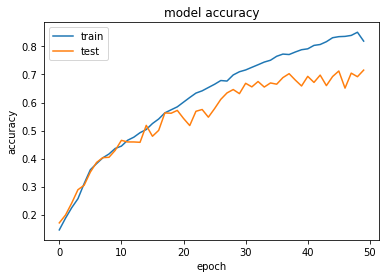

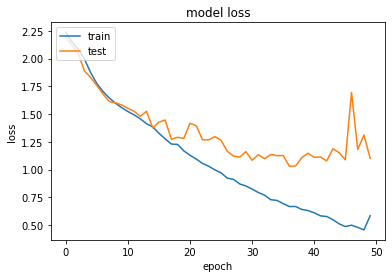

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()